<class 'pandas.core.frame.DataFrame'>


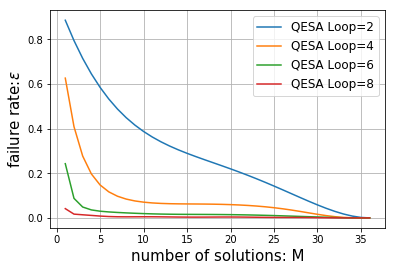

In [4]:
import numpy as np
from numpy.linalg import cholesky
import matplotlib.pyplot as plt
from math import pi
from pylab import *
import pandas as pd

data = pd.read_csv('Grover.csv')#导入数据，2000行，4列

print(type(data))

#data = np.array(data)
x = np.linspace(1,36,len(data))
#plt.plot(x,data['ESA=1'],label='ESA Loop=1')
plt.plot(x,data['ESA=2'],label='QESA Loop=2')
#plt.plot(x,data['ESA=3'],label='ESA Loop=3')
plt.plot(x,data['ESA=4'],label='QESA Loop=4')
#plt.plot(x,data['ESA=5'],label='ESA Loop=5')
plt.plot(x,data['ESA=6'],label='QESA Loop=6')
#plt.plot(x,data['ESA=7'],label='ESA Loop=7')
plt.plot(x,data['ESA=8'],label='QESA Loop=8')
plt.legend(fontsize=12)
plt.grid(True)
xlabel('number of solutions: M',fontsize=15)
ylabel(r'failure rate:$\varepsilon$',fontsize=15)
plt.show()

<class 'pandas.core.frame.DataFrame'>


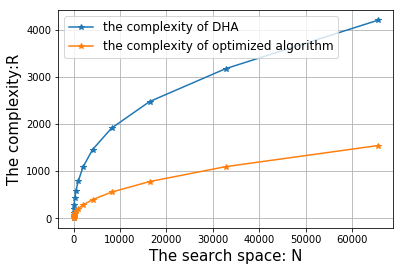

In [2]:
import numpy as np
from numpy.linalg import cholesky
import matplotlib.pyplot as plt
from math import pi
from pylab import *
import pandas as pd

com =  pd.read_csv('compare.csv')
print(type(com))

plt.plot(com['classical'],com['DHA'],label='the complexity of DHA', marker='*')
plt.plot(com['classical'],com['optimized'],label='the complexity of optimized algorithm', marker='*')
plt.legend(fontsize=12)
plt.grid(True)
xlabel('The search space: N',fontsize=15)
ylabel('The complexity:R',fontsize=15)
plt.show()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


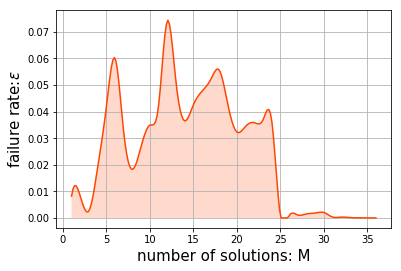

In [4]:
from scipy.interpolate import spline
#失败率
data1 = pd.read_csv('movie.csv')
data2 = pd.read_csv('Titanic.csv')


#x1 = [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,31,31,31,31,31,31,31,31,31,31,31]
#x2 = [1, 3, 4, 5, 6, 7, 9, 11, 12, 13, 14, 15, 17, 19, 20, 21, 22, 23, 25, 27, 28, 29, 30, 31, 41, 43, 44, 45, 46, 47, 57, 59, 60, 61, 62, 63]

x1 = np.linspace(1,25,len(data1))
x2 = np.linspace(1,36,len(data2))
'''
plt.plot(x1,data1['failure rate'],'-',color='#20B2AA',label='movie score')
plt.plot(x2,data2['failure rate'], '-',color='#FF4500',label='passenager age')
plt.legend(fontsize=12)
plt.grid(True)

# 填充指定区域
plt.fill_between(x1,data1['failure rate'],facecolor='#20B2AA',alpha=0.2)#alpha是透明度参数
# 可以填充多次
plt.fill_between(x2,data2['failure rate'],facecolor='#FF4500',alpha=0.2)
'''
#曲线平滑,使用差值法
smooth_x1 = np.linspace(x1.min(),x1.max(),200)
smooth_y1 = spline(x1,data1['failure rate'],smooth_x1)
smooth_x2 = np.linspace(x2.min(),x2.max(),200) 
smooth_y2 = spline(x2,data2['failure rate'],smooth_x2)
for i in range(200):
    if smooth_y2[i]<0:
        smooth_y2[i] = 0

#plt.plot(smooth_x1,smooth_y1,'-',color='#20B2AA',label='movie score')
plt.plot(smooth_x2,smooth_y2, '-',color='#FF4500',label='passenager age')
#plt.legend(fontsize=12)
plt.grid(True)

xlabel('number of solutions: M',fontsize=15)
ylabel(r'failure rate:$\varepsilon$',fontsize=15)

# 填充指定区域
#plt.fill_between(smooth_x1,smooth_y1,facecolor='#20B2AA',alpha=0.2)#alpha是透明度参数
# 可以填充多次
plt.fill_between(smooth_x2,smooth_y2,facecolor='#FF4500',alpha=0.2)

plt.show()

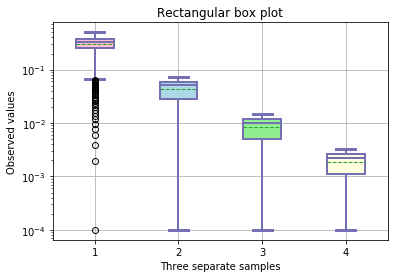

In [14]:
import matplotlib.pyplot as plt
import numpy as np

LF1 = pd.read_csv('LF1.csv')#导入数据

x1 = LF1['1比2']
x1 = x1.dropna(axis=0)
x2 = LF1['1比4']
x2 = x2.dropna(axis=0)
x3 = LF1['1比8']
x3 = x3.dropna(axis=0)
x4 = LF1['1比16']
x4 = x4.dropna(axis=0)

x=[x1,x2,x3,x4]
for xx in x:
    for i in range(len(xx)):
        if xx[i]<1e-4:
            xx[i]=1e-4
        
bplot = plt.boxplot(x,patch_artist=True,showmeans=True,meanline=True)  # 设置箱型图可填充
#bplot2 = plt.boxplot(x2,patch_artist=True,showmeans=True,meanline=True)  # 设置箱型图可填充
#bplot3 = plt.boxplot(x3,patch_artist=True,showmeans=True,meanline=True)  # 设置箱型图可填充
#bplot4 = plt.boxplot(x4,patch_artist=True,showmeans=True,meanline=True)  # 设置箱型图可填充
plt.title('Rectangular box plot')
plt.yscale('log')
colors = ['pink', 'lightblue', 'lightgreen','lightyellow']
for patch, color in zip(bplot['boxes'], colors):
    patch.set(color='#7570b3', linewidth=2)
    patch.set_facecolor(color)  # 为不同的箱型图填充不同的颜色
for median in bplot['medians']:
    median.set(color='#7570b3', linewidth=2)
for whisker in bplot['whiskers']:
    whisker.set(color='#7570b3', linewidth=2, alpha=1)
for cap in bplot['caps']:
    cap.set(color='#7570b3', linewidth=3)
for flier in bplot['fliers']:
    flier.set(marker='o', color='y', alpha=1)

plt.grid(True)
plt.xlabel('Three separate samples')
plt.ylabel('Observed values')
plt.show()


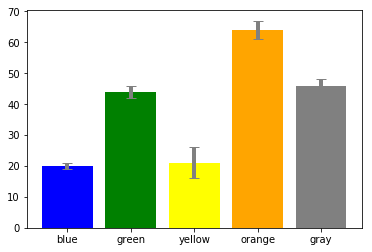

In [37]:
import matplotlib.pyplot as plt

x=[1,2,3,4,5]
#数据集
y=[20,44,21,64,46]
#误差列表
std_err=[1,2,5,3,2]

error_params=dict(elinewidth=4,ecolor='gray',capsize=5)#设置误差标记参数
#绘制柱状图，设置误差标记以及柱状图标签
plt.bar(x,y,color=['b','g','yellow','orange','gray'],yerr=std_err,error_kw=error_params,\
                    tick_label=['blue','green','yellow','orange','gray'])
#显示图形
plt.show()

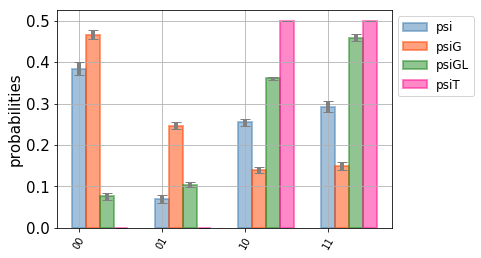

In [6]:
import matplotlib.pyplot as plt
 
name_list = ['00','01','10','11']
init = [0.3838, 0.0694, 0.2545, 0.2923]  
G = [0.46574326, 0.246846401, 0.139129359, 0.148280979]  
GL = [0.0762, 0.104, 0.3607, 0.4591]
theo = [0,0,0.5,0.5]
x =list(range(len(name_list)))
total_width, n = 1, 6
width = total_width / n

error_params=dict(elinewidth=4,ecolor='gray',capsize=5)#设置误差标记参数

plt.bar(x, init, width=width, label='psi',tick_label = name_list,color = 'steelblue',alpha=0.5,\
        edgecolor = 'steelblue',linewidth=2,yerr=[0.016011246, 0.009666437, 0.00839345, 0.0129],error_kw=error_params)
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, G, width=width, label='psiG',tick_label = name_list,color = '#FF4500',alpha=0.5,\
        edgecolor = '#FF4500',linewidth=2,yerr=[0.0111851,0.00944087,0.00652538,0.009399913],error_kw=error_params)
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, GL, width=width, label='psiGL',tick_label = name_list,color = 'forestgreen',alpha=0.5,\
        edgecolor = 'forestgreen',linewidth=2,yerr=[0.008908423, 0.00609918, 0.003716181, 0.007529276],error_kw=error_params)
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, theo, width=width, label='psiT',tick_label = name_list,color  = 'deeppink',alpha=0.5,\
        edgecolor = 'deeppink',linewidth=2,yerr=0,error_kw=error_params)
'''
for x, y in enumerate(init):
    plt.text(x, y + 0.04, '%s' % y, ha='center', va='top',fontsize=12)
for x, y in enumerate(G):
    plt.text(x+width, y + 0.04, '%s' % y, ha='center', va='top',fontsize=12)
for x, y in enumerate(GL):
    if x== 1:
        plt.text(x+2*width, y + 0.04, '%s' % y, ha='center', va='bottom',fontsize=12)
    else:
        plt.text(x+2*width, y + 0.04, '%s' % y, ha='center', va='top',fontsize=12)
for x, y in enumerate(theo):
    plt.text(x+3*width, y + 0.04, '%s' % y, ha='center', va='top',fontsize=12)
'''
plt.xticks(rotation=60)
plt.yticks(fontsize=15)
plt.xticks(range(0,4))
#plt.xlim([-0.2,3.8])

plt.ylabel('probabilities',fontsize=15)
plt.legend(fontsize=12, bbox_to_anchor=(1, 1))
plt.grid(True)

plt.show()


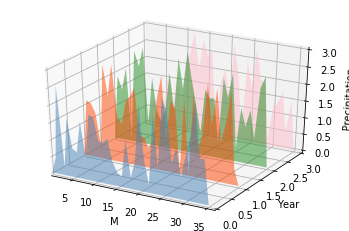

In [12]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.collections import PolyCollection
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')

np.random.seed(59)
month = np.arange(0, 36)
years = [0, 1, 2, 3]

precipitation = []
for year in years:
    value = np.random.rand(len(month)) * 3
    value[0], value[-1] = 0, 0
    precipitation.append(list(zip(month, value)))

poly = PolyCollection(precipitation, facecolors=['steelblue','#FF4500','forestgreen','pink'])
poly.set_alpha(0.5)

ax.add_collection3d(poly, zs=years, zdir='y')
ax.set_xlabel('M')
ax.set_xlim3d(1, 36)
ax.set_ylabel('Year')
ax.set_ylim3d(0,3)
ax.set_zlabel('Precipitation')
ax.set_zlim3d(0, 3)

plt.show()

<class 'pandas.core.frame.DataFrame'>


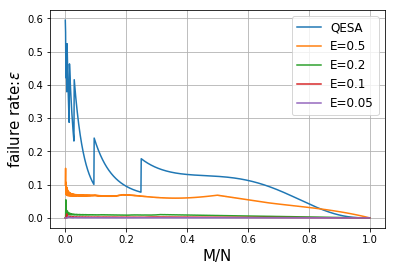

In [2]:
import numpy as np
from numpy.linalg import cholesky
import matplotlib.pyplot as plt
from math import pi
from pylab import *
import pandas as pd

FR =  pd.read_csv('FR.csv')

print(type(FR))

plt.plot(FR['M']/1024,FR['FR_ESA'],label='QESA')
plt.plot(FR['M']/1024,FR['E=0.5'],label='E=0.5')
plt.plot(FR['M']/1024,FR['E=0.2'],label='E=0.2')
plt.plot(FR['M']/1024,FR['E=0.1'],label='E=0.1')
plt.plot(FR['M']/1024,FR['E=0.05'],label='E=0.05')

plt.legend(fontsize=12)
plt.grid(True)
xlabel('M/N',fontsize=15)
ylabel(r'failure rate:$\varepsilon$',fontsize=15)
plt.show()